#Principal Component Analysis (PCA) 

## O que é PCA?
A Análise de Componentes Principais, ou PCA, é um método de redução de dimensionalidade que é frequentemente usado para reduzir a dimensionalidade de grandes conjuntos de dados, transformando um grande conjunto de variáveis ​​em um menor que ainda contém a maioria das informações do conjunto original.

Reduzir o número de variáveis ​​de um conjunto de dados naturalmente vem à custa da precisão, mas o truque na redução da dimensionalidade é trocar um pouco de precisão por simplicidade. Porque conjuntos de dados menores são mais fáceis de explorar e visualizar e tornam a análise de dados muito mais fácil e rápida para algoritmos de aprendizado de máquina sem variáveis ​​estranhas para processar.

Então, para resumir, a ideia do PCA é simples – reduza o número de variáveis ​​de um conjunto de dados, preservando o máximo de informações possível.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
X = df.drop("target", 1)
y = df["target"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
X.shape

# 1 - Uniformização

O objetivo desta etapa é padronizar o intervalo das variáveis ​​iniciais contínuas para que cada uma delas contribua igualmente para a análise.

Mais especificamente, a razão pela qual é fundamental realizar a padronização antes do PCA, é que este último é bastante sensível em relação às variâncias das variáveis ​​iniciais. Ou seja, se houver grandes diferenças entre os intervalos das variáveis ​​iniciais, aquelas variáveis ​​com intervalos maiores dominarão aquelas com intervalos pequenos (Por exemplo, uma variável que varia entre 0 e 100 dominará uma variável que varia entre 0 e 1 ), o que levará a resultados tendenciosos. Portanto, transformar os dados em escalas comparáveis ​​pode evitar esse problema.

Matematicamente, isso pode ser feito subtraindo a média e dividindo pelo desvio padrão para cada valor de cada variável.

$$ z =\dfrac{ X - μ}{σ^2}$$

Feita a padronização, todas as variáveis ​​serão transformadas para a mesma escala.

In [ ]:
#media por coluna
Xavg = np.mean(X,axis=0) 
print(Xavg)

sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64


In [ ]:
#desvio padrao por coluna
Xstd = X.std()
print(Xstd)

sepal length    0.828066
sepal width     0.433594
petal length    1.764420
petal width     0.763161
dtype: float64


In [ ]:
nPoints = X.shape[0]
B = X - np.tile(Xavg,(nPoints,1))  

In [ ]:
B_ = B / Xstd

In [ ]:
B_.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


In [ ]:
B_.cov()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


#3 - Matriz de Covariância
O objetivo desta etapa é entender como as variáveis ​​do conjunto de dados de entrada estão variando da média entre si, ou seja, verificar se existe alguma relação entre elas. Porque às vezes, as variáveis ​​são altamente correlacionadas de tal forma que contêm informações redundantes. Assim, para identificar essas correlações, calculamos a matriz de covariância.

A matriz de covariâncias é uma matriz simétrica $p \times p$ (onde $p$ é o número de dimensões) que tem como entradas as covariâncias associadas a todos os pares possíveis das variáveis ​​iniciais. Por exemplo, para um conjunto de dados tridimensional com $3$ variáveis $​​x, y$ e $z,$ a matriz de covariância é uma matriz $3 \times 3$ de:

$$   \begin{bmatrix} 
  Cov(x,x) & Cov(x,y) & Cov(x,z) \\ 
  Cov(y,x) & Cov(y,y) & Cov(y,z) \\ 
  Cov(z,x) & Cov(z,y) & Cov(z,z) \\
  \end{bmatrix} $$
$ \\ $

Como a covariância de uma variável consigo mesma é sua variância ($Cov(a,a)=Var(a)$), na diagonal principal na verdade temos as variâncias de cada variável inicial. E como a covariância é comutativa ($Cov(a,b)=Cov(b,a)$), as entradas da matriz de covariâncias são simétricas em relação à diagonal principal, o que significa que as porções triangulares superior e inferior são iguais.

In [ ]:
C = B.T.dot(B) / (X.shape[0] - 1)

In [ ]:
D = B.corr()

In [ ]:
C

,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [ ]:
B.cov()

,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


#4 - Autovetores e Autovalores da Matriz de Covariância

Componentes principais são novas variáveis ​​que são construídas como combinações lineares. Essas combinações são feitas de tal forma que as novas variáveis ​​(ou seja, componentes principais) não são correlacionadas e a maioria das informações dentro das variáveis ​​iniciais é espremida ou comprimida nos primeiros componentes. Portanto, a ideia é que os dados de 10 dimensões fornecem 10 componentes principais, mas o PCA tenta colocar o máximo de informações possíveis no primeiro componente, depois o máximo de informações restantes no segundo e assim por diante.

Geometricamente falando, os componentes principais representam as direções dos dados que explicam uma quantidade máxima de variância, ou seja, as linhas que capturam mais informações dos dados. A relação entre variância e informação aqui é que, quanto maior a variância transportada por uma linha, maior a dispersão dos pontos de dados junto com ela, e quanto maior a dispersão ao longo de uma linha, mais informações ela possui. Para simplificar tudo, pense nos componentes principais como novos eixos que fornecem o melhor ângulo para ver e avaliar os dados, para que as diferenças entre as observações sejam melhor visíveis.

## Polinômio Característico

$$p_C(x) = det(C - xI)$$

Onde $I$ é a matriz identidade. 



In [ ]:
#Determinando autovalores e autovetores
autovalores, autovetores = np.linalg.eig(C)

In [ ]:
#Imprimindo autovalores de C
print("Autovalores:{}".format(autovalores))

Autovalores:[4.22484077 0.24224357 0.07852391 0.02368303]


In [ ]:
#Imprimindo autovetores de C
print("Autovetores:{}".format(autovetores))

Autovetores:[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


Agora, ordenaremos os autovalores do maior para o menor. Isso é necessário apenas se não tiverem ordenados dessa forma.

In [ ]:
pares_autos = [(
    np.abs(autovalores[i]),
    autovetores[:,i]
    ) for i in range(len(autovalores))
]
pares_autos.sort()
#pares_autos
pares_autos.reverse()

In [ ]:
pares_autos

[(4.224840768320109,
  array([ 0.36158968, -0.08226889,  0.85657211,  0.35884393])),
 (0.24224357162751498,
  array([-0.65653988, -0.72971237,  0.1757674 ,  0.07470647])),
 (0.0785239080941545,
  array([-0.58099728,  0.59641809,  0.07252408,  0.54906091])),
 (0.023683027126000945,
  array([ 0.31725455, -0.32409435, -0.47971899,  0.75112056]))]

Os autovetores estão representando a variabilidade dos nossos dados e estão ordenadas em relação aos maiores autovalores, que estão representando a quantidade de variabilidade nos nossos dados!. 

A variância explicada de cada auto-valor 𝜆 é dada por:
$$ \dfrac{𝜆}{\sum_{i=1} 𝜆_i} $$

A variância explicada acumulada de cada autovalor 𝜆.

In [ ]:
soma_total = sum(autovalores)

In [ ]:
var = [(i / soma_total)*100 for i in sorted(autovalores, reverse=True)]

In [ ]:
acum_var = np.cumsum(var)

In [ ]:
x = ['PCA %s' %i for i in range(1, len(autovalores) +1)]

In [ ]:
df_pca = pd.DataFrame({
    'autovalores': autovalores,
    'acum_var': acum_var,
    'var': var,
    'Componente_P':x
})

In [ ]:
df_pca

,autovalores,acum_var,var,Componente_P
0,4.224841,92.461621,92.461621,PCA 1
1,0.242244,97.763178,5.301557,PCA 2
2,0.078524,99.481691,1.718514,PCA 3
3,0.023683,100.000000,0.518309,PCA 4


In [ ]:
autovetores[0:2]

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435]])

Se queremos as compoenentes que explicam o acum_var referente a $97.763178$, precisamos multiplicar nossa matriz original $X$, pela matriz de autovetores truncada até a compoenente principal que queremos

$$ T = XW $$

Onde $W$ é uma matriz $m\times m$ de autovetores, $X$ é a nossa matriz de feautures $n \times m$ e T é a nossa matriz $n \times m$ das componentes principais.

$$T_r = XW_r$$

Onde $W_r$ é a matriz truncada em $r$ componentes e $T$ é a matriz com $r$ componentes principais.

In [ ]:
n_comp = df_pca.shape[0]
autovetores = [p[1] for p in pares_autos]
A = autovetores[0:2]
X_ = np.dot(X,np.array(A).T)
df_new = pd.DataFrame(X_,columns = x[0:2])
df_new['target'] = df['target']

In [ ]:
df_new

,PCA 1,PCA 2,target
0,2.827136,-5.641331,Iris-setosa
1,2.795952,-5.145167,Iris-setosa
2,2.621524,-5.177378,Iris-setosa
3,2.764906,-5.003599,Iris-setosa
4,2.782750,-5.648648,Iris-setosa
...,...,...,...
145,7.455360,-5.502139,Iris-virginica
146,7.037007,-4.939703,Iris-virginica
147,7.275389,-5.393243,Iris-virginica
148,7.412972,-5.430600,Iris-virginica


In [ ]:
df_new.drop('target',1).cov()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,PCA 1,PCA 2
PCA 1,4.224841e+00,-5.948946e-16
PCA 2,-5.948946e-16,2.422436e-01


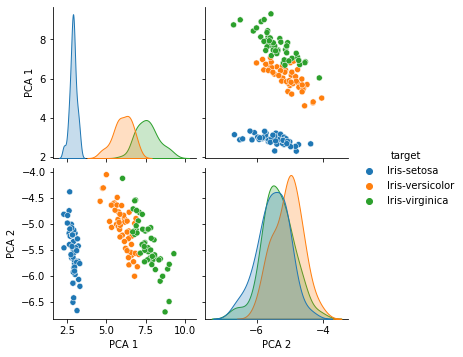

In [ ]:
sns.pairplot(
    df_new, vars = x[0:2], hue='target'
)
plt.show()

# Como escolher $r$?

Basta olharmos para o gráfico da soma acumulada e escolher a quantidade de variância que queremos explicar no nosso problema.

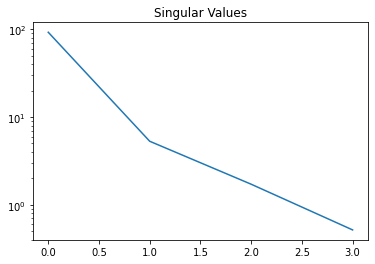

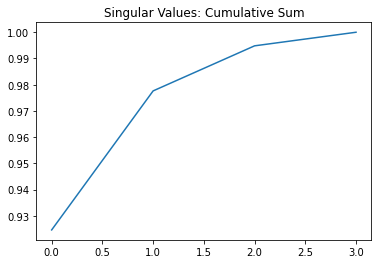

In [ ]:
## f_ch01_ex02_2

plt.figure(1)
plt.semilogy(df_pca['var'])
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(df_pca['var'])/np.sum(df_pca['var']))
plt.title('Singular Values: Cumulative Sum')
plt.show()

In [ ]:
sns.pairplot(
    df,
    vars = ['sepal length','sepal width','petal length','petal width'],
    hue = 'target'
)
plt.show()

# Aplicando PCA com Sklearn

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
#autovalores
pca.explained_variance_

array([4.22484077, 0.24224357])

In [ ]:
#autovetores
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [ ]:
#variancia explicada
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [ ]:
X__ = pca.transform(X)

In [ ]:
new_df = pd.DataFrame(X__, columns=["pc1", "pc2"])

In [ ]:
new_df.head()

,pc1,pc2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [ ]:
new_df.cov()

,pc1,pc2
pc1,4.224841e+00,1.059866e-16
pc2,1.059866e-16,2.422436e-01


In [ ]:
new_df["target"] = df["target"]

In [ ]:
sns.pairplot(
    new_df, vars=["pc1", "pc2"] , hue="target"
)
plt.show()

# Elipses e autovetores

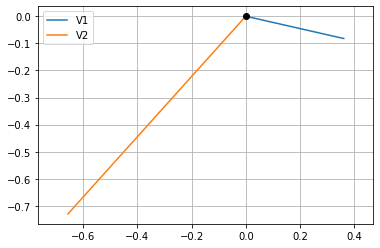

In [ ]:
M =  np.array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],[-0.65653988, -0.72971237,  0.1757674 ,  0.07470647]])
#M =  np.array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],[ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])
rows,cols = M.T.shape

#Get absolute maxes for axis ranges to center origin
maxes = 1.1*np.amax(abs(M), axis = 0)

for i,l in enumerate(range(0,cols)):
    xs = [0,M[i,0]]
    ys = [0,M[i,1]]
    plt.plot(xs,ys)

plt.plot(0,0,'ok') #<-- plot a black point at the origin
plt.axis('equal')  #<-- set the axes to the same scale

plt.legend(['V'+str(i+1) for i in range(cols)]) #<-- give a legend
plt.grid(b=True, which='major') #<-- plot grid lines
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [ ]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [ ]:
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

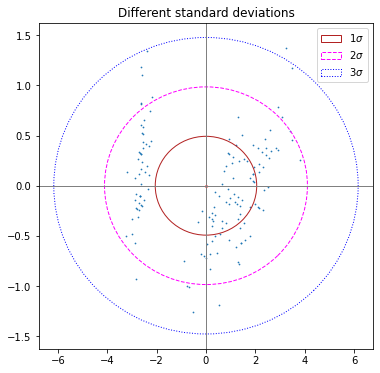

In [ ]:
fig, ax_nstd = plt.subplots(figsize=(6, 6))

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 0, 0
scale = 8, 5

ax_nstd.axvline(c='grey', lw=1)
ax_nstd.axhline(c='grey', lw=1)

x, y = new_df.pc1.values, new_df.pc2.values
ax_nstd.scatter(x, y, s=0.5)

confidence_ellipse(x, y, ax_nstd, n_std=1,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax_nstd, n_std=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')


ax_nstd.scatter(mu[0], mu[1], c='red', s=3)
ax_nstd.set_title('Different standard deviations')
ax_nstd.legend()
plt.show()

# Calculando com SVD

Tem um método mais otimizado de calcular nossas componentes principais, que é calculando a decomposição em valores singulares da nossa matriz $X$.

$$ X =  UΣV^*$$

Onde $U$ é a matriz de vetores singulares à esquerda, $Σ$ é a matriz de valores singulares (matriz diagonal) e  é a matriz de vetores singulares à direita (que é a nossa matriz de autovetores $W$).

Portanto

$$T = XW$$

Multiplicando ambos os lados por V
$$XV = UΣV^*V = UΣ$$

Portanto

$$T = UΣ$$ 

e até mesmo

$$T_r = U_rΣ_r$$

O algoritmo do SVD é muito rápido e mais eficiente do que calcular PCA. Pois não queremos a matriz de covariância.

In [ ]:
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=0)

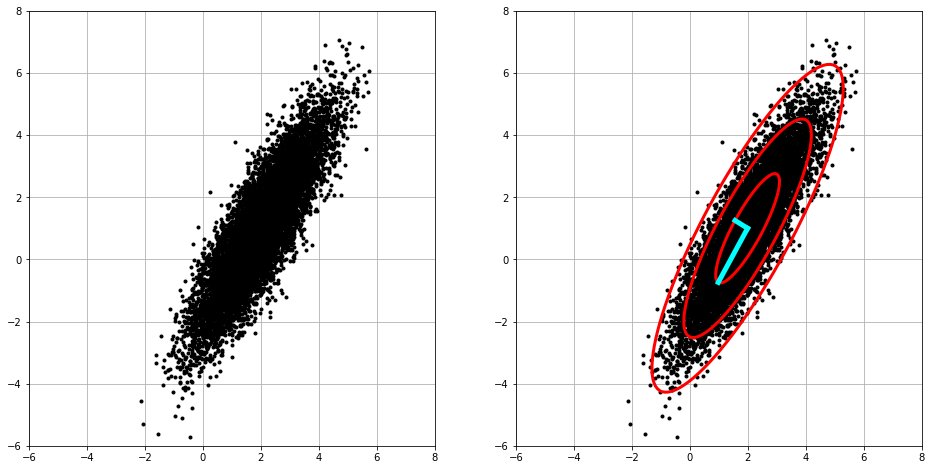

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', Color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

## f_ch01_ex03_1b

Xavg = np.mean(X,axis=1)                  # Compute mean
B = X - np.tile(Xavg,(nPoints,1)).T       # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=0)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', Color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',LineWidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',LineWidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',LineWidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',LineWidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',LineWidth=5)

plt.show()

# PCA aplicado em Imagens





In [ ]:
from google.colab import files
files.upload()

Saving dog.jpg to dog.jpg


{'dog.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lumi\x00\x00\x03\xf8\x00\x00\x00\x14meas\x00\x00\x04\x0c\x00\x00\x00$tech\x00\x00\x040\x00\x00\x00\x0crTRC\x00

In [ ]:
from matplotlib.image import imread

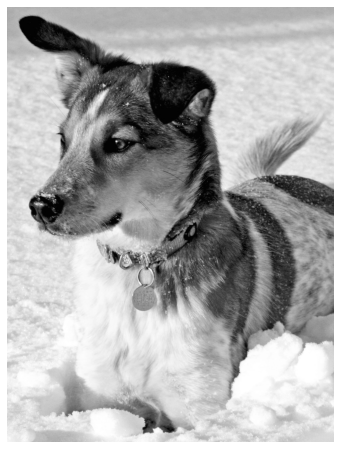

In [ ]:
plt.rcParams['figure.figsize'] = [16, 8]


A = imread('dog.jpg')
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

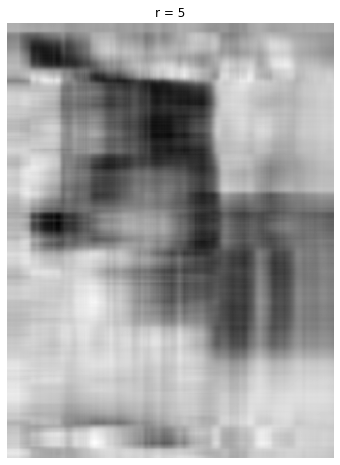

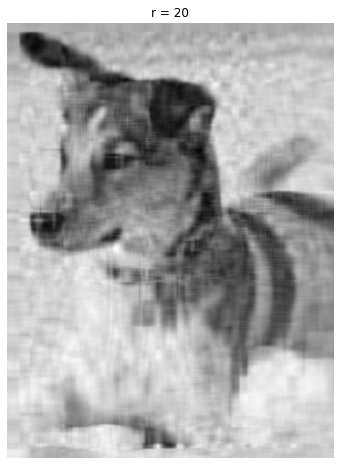

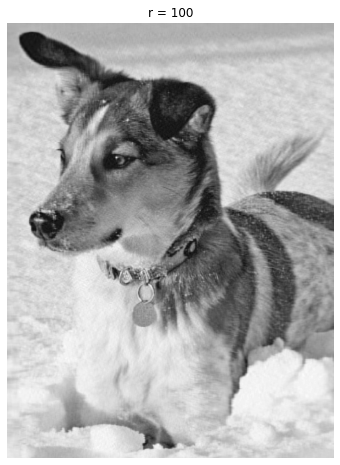

In [ ]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

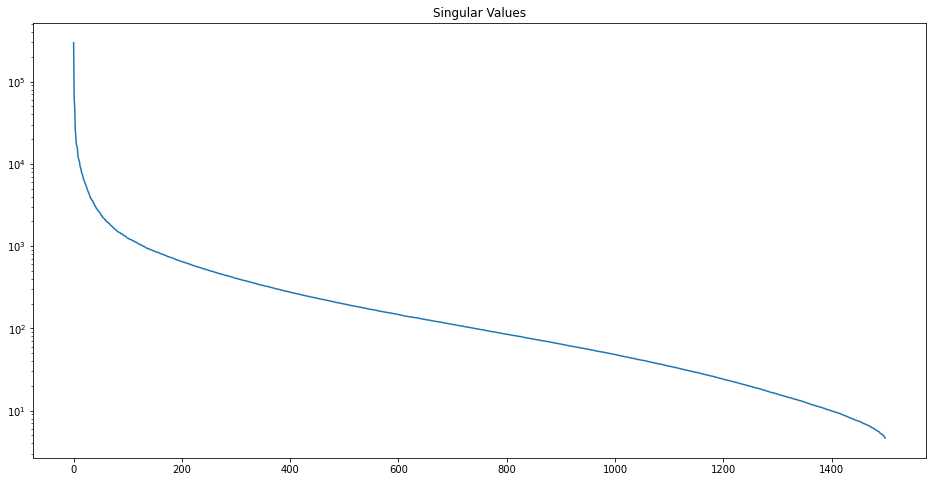

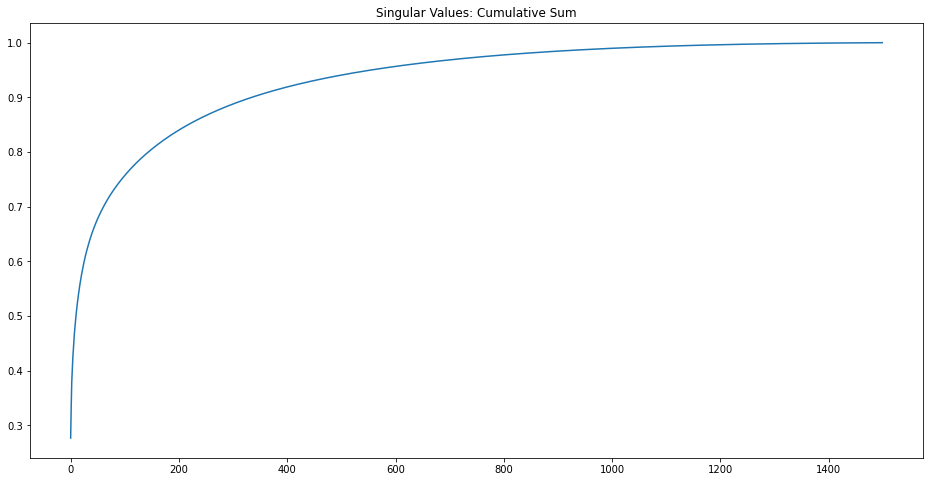

In [ ]:
## f_ch01_ex02_2

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

# Calculando com a matriz de Correlacao

In [ ]:
#Determinando autovalores e autovetores
autovalores, autovetores = np.linalg.eig(D)

In [ ]:
#Imprimindo autovalores de D
print("Autovalores:{}".format(autovalores))

Autovalores:[2.91081808 0.92122093 0.14735328 0.02060771]


In [ ]:
#Imprimindo autovetores de D
print("Autovetores:{}".format(autovetores))

Autovetores:[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [ ]:
pares_autos = [(
    np.abs(autovalores[i]),
    autovetores[:,i]
    ) for i in range(len(autovalores))
]
pares_autos.sort()
#pares_autos
pares_autos.reverse()

In [ ]:
soma_total = sum(autovalores)

In [ ]:
var = [(i / soma_total)*100 for i in sorted(autovalores, reverse=True)]

In [ ]:
acum_var = np.cumsum(var)

In [ ]:
x = ['PCA %s' %i for i in range(1, len(autovalores) +1)]

In [ ]:
df_pca = pd.DataFrame({
    'autovalores': autovalores,
    'acum_var': acum_var,
    'var': var,
    'Componente_P':x
})

In [ ]:
df_pca

,autovalores,acum_var,var,Componente_P
0,2.910818,72.770452,72.770452,PCA 1
1,0.921221,95.800975,23.030523,PCA 2
2,0.147353,99.484807,3.683832,PCA 3
3,0.020608,100.000000,0.515193,PCA 4


In [ ]:
n_comp = df_pca.shape[0]
autovetores = [p[1] for p in pares_autos]
A = autovetores[0:n_comp]
X_ = np.dot(X,np.array(A).T)
df_new = pd.DataFrame(X_,columns = x)
df_new['target'] = df['target']

In [ ]:
df_new

,PCA 1,PCA 2,PCA 3,PCA 4,target
0,2.669231,-5.180887,-2.506061,-0.115201,Iris-setosa
1,2.696434,-4.643645,-2.482874,-0.105533,Iris-setosa
2,2.481163,-4.752183,-2.304354,-0.102643,Iris-setosa
3,2.571512,-4.626615,-2.228277,-0.276660,Iris-setosa
4,2.590658,-5.236211,-2.409756,-0.153814,Iris-setosa
...,...,...,...,...,...
145,7.033251,-5.531352,-1.914331,-1.578880,Iris-virginica
146,6.613485,-4.889261,-2.028640,-1.670798,Iris-virginica
147,6.759094,-5.437263,-1.960268,-1.788343,Iris-virginica
148,6.782974,-5.719634,-1.428831,-1.919762,Iris-virginica


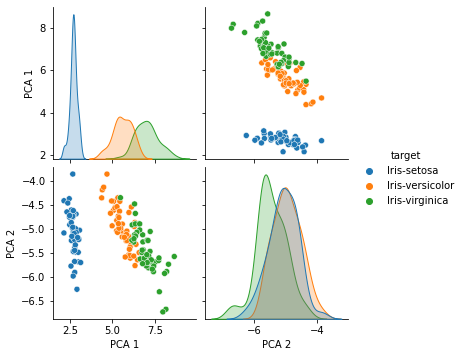

In [ ]:
sns.pairplot(
    df_new, vars = x[0:2], hue='target'
)
plt.show()

In [ ]:
M =  np.array([[0.52237162, -0.37231836, -0.72101681,  0.26199559],[-0.26335492, -0.92555649,  0.24203288, -0.12413481]])
#M =  np.array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],[ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])
rows,cols = M.T.shape

#Get absolute maxes for axis ranges to center origin
maxes = 1.1*np.amax(abs(M), axis = 0)

for i,l in enumerate(range(0,cols)):
    xs = [0,M[i,0]]
    ys = [0,M[i,1]]
    plt.plot(xs,ys)

plt.plot(0,0,'ok') #<-- plot a black point at the origin
plt.axis('equal')  #<-- set the axes to the same scale

plt.legend(['V'+str(i+1) for i in range(cols)]) #<-- give a legend
plt.grid(b=True, which='major') #<-- plot grid lines
plt.show()

In [ ]:
## f_ch01_ex02_2

plt.figure(1)
plt.semilogy(df_pca['var'])
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(df_pca['var'])/np.sum(df_pca['var']))
plt.title('Singular Values: Cumulative Sum')
plt.show()

# Conclusão

Podemos ver como PCA pode ajudar a reduzir a dimensionalidade dos nossos dados para aprimorar modelos de Machine Learning e Deep Learning, ou até mesmo como usar para visualizar nossos dados. Também é feita a comparação entre o uso da matriz de correlação e covariância. Nesse estudo podemos ver que a matriz de covariância armazena mais variância nas duas primeiras variáveis.